In [16]:
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩

plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False

In [9]:
df = pd.read_csv("C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression/물품,용역,공사_20172021.xls")
df.shape

(1059039, 17)

In [13]:
df['공고게시일자'] = df['공고게시일자'].astype(str)
df['공고게시일자'] = pd.to_datetime(df['공고게시일자'])
df['입찰계약방법축소'] = df.입찰계약방법.str.split('(').str[0]

In [14]:
#df['week']=df['공고게시일자'].dt.week

df.sort_values(by=['공고게시일자'], axis=0, ascending=True)

,등록유형,공고게시일자,조달구분,입찰공고차수,수요기관명,수요기관코드,긴급공고여부,정정공고여부,취소공고여부,추정가격,입찰방식,낙찰자결정방법,입찰계약방법,예가방법,업종제한내용,지역제한내용,대상,입찰계약방법축소
781213,나라장터(G2B),2017-01-01,자체조달,0,부산광역시 금정구,3350000,Y,N,N,272232728.0,전자입찰,[조달청 기준] 시설분야용역 적격심사(추정가격 5억원미만),제한(총액),복수예가,[건물위생관리업(1162)],부산광역시[26000],용역,제한
781212,나라장터(G2B),2017-01-01,자체조달,0,국립공원공단 한려해상국립공원동부사무소,Z005216,N,N,N,90909090.0,전자입찰,추정가격 고시금액미만(건축사법에 따른 설계 1억미만),제한경쟁,복수예가,[건축사사무소(4817)],경상남도[48000],용역,제한경쟁
769900,나라장터(G2B),2017-01-01,자체조달,0,부산광역시 금정구,3350000,Y,N,N,156568146.0,전자입찰,[조달청 기준] 시설분야용역 적격심사(추정가격 5억원미만),제한(총액),복수예가,[건물위생관리업(1162)],부산광역시[26000],용역,제한
769901,나라장터(G2B),2017-01-01,자체조달,0,부산광역시 금정구,3350000,Y,N,N,49836000.0,전자입찰,제한적최저가(낙찰하한율),수의(총액)소액수의,복수예가,[세탁업(5224)],부산광역시[26000],용역,수의
769902,나라장터(G2B),2017-01-01,자체조달,0,부산광역시 금정구,3350000,Y,N,N,21326800.0,전자입찰,제한적최저가(낙찰하한율),수의(총액)소액수의,복수예가,[근로자파견사업(1172)],부산광역시[26000],용역,수의
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639440,나라장터(G2B),2021-12-31,자체조달,0,경기도교육청 경기도화성오산교육지원청 화성금곡초등학교,7679013,N,N,N,120740000.0,전자입찰,수의(견적제출),수의(소액)-견적입찰(2인 이상 견적 제출),복수예가,[실내건축공사업(0006)],"경기도 화성시[41590], 경기도 오산시[41370]",공사,수의
639439,나라장터(G2B),2021-12-31,자체조달,1,영산대학교,7003577,N,Y,N,225000000.0,직찰,제한최저,지역제한,단일예가,[실내건축공사업(0006)],"부산광역시[26000], 울산광역시[31000], 경상남도[48000]",공사,지역제한
639438,나라장터(G2B),2021-12-31,자체조달,0,충청남도교육청 충청남도서천교육지원청,8241000,N,N,N,110643636.0,전자입찰,수의(견적제출),수의(소액),복수예가,[금속구조물·창호·온실공사업(1440)],충청남도 서천군[44770],공사,수의
639436,나라장터(G2B),2021-12-31,자체조달,1,경기도교육청 경기도화성오산교육지원청 가수초등학교,7679076,Y,Y,N,98899091.0,전자입찰,수의(견적제출),수의(소액)-견적입찰(2인 이상 견적 제출),복수예가,[실내건축공사업(0006)],"경기도 오산시[41370], 경기도 화성시[41590]",공사,수의


In [102]:
df_service = df[df.대상=="용역"]
df_service['week']=df_service['공고게시일자'].dt.week

df_item = df[df.대상=="물품"]
df_item['week']=df_item['공고게시일자'].dt.week

df_build = df[df.대상=="공사"]
df_build['week']=df_build['공고게시일자'].dt.week
df_build = df_build.astype({'추정가격': 'np.int64'})

C:\Users\yjhon\AppData\Local\Temp/ipykernel_8380/49818775.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_service['week']=df_service['공고게시일자'].dt.week
C:\Users\yjhon\AppData\Local\Temp/ipykernel_8380/49818775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_service['week']=df_service['공고게시일자'].dt.week
C:\Users\yjhon\AppData\Local\Temp/ipykernel_8380/49818775.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_item['week']=df_item['공고게시일자'].dt.week
C:\Users\yjhon\AppData\Local\Temp/ipykernel_8380/49818775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

TypeError: data type 'np.int64' not understood

In [115]:
temp = df_service.iloc[:1500]
temp

,등록유형,공고게시일자,조달구분,입찰공고차수,수요기관명,수요기관코드,긴급공고여부,정정공고여부,취소공고여부,추정가격,입찰방식,낙찰자결정방법,입찰계약방법,예가방법,업종제한내용,지역제한내용,대상,입찰계약방법축소,week
764226,나라장터(G2B),2017-03-31,자체조달,0,강원도,6420000,N,N,N,153636363.0,전자입찰,제한최저,제한(총액),복수예가,[폐기물중간처리업(건설폐기물)(1253) 과 폐기물수집.운반업(건설폐기물)(6728...,강원도[42000],용역,제한,13
764227,나라장터(G2B),2017-03-31,자체조달,0,경기도 남양주시,3990000,N,N,N,28960000.0,전자입찰,제한최저,수의(총액)소액-견적입찰,복수예가,[폐기물수집.운반업(건설폐기물)(6728) 과 폐기물중간처리업(건설폐기물)(1253)],경기도 남양주시[41360],용역,수의,13
764228,나라장터(G2B),2017-03-31,자체조달,2,경상남도교육청 경상남도창원교육지원청 명도초등학교,9022036,N,Y,N,36172727.0,전자입찰,제한최저,수의(총액),복수예가,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],경상남도 창원시[48120],용역,수의,13
764229,나라장터(G2B),2017-03-31,자체조달,1,경상남도 하동군,5440000,N,Y,N,30900000.0,전자입찰,제한최저,소액수의(견적입찰),복수예가,[폐기물중간처리업(건설폐기물)(1253)],"경상남도 하동군[48850], 전라남도 광양시[46230]",용역,소액수의,13
764230,나라장터(G2B),2017-03-31,자체조달,0,국토교통부 대전지방국토관리청 보은국토관리사무소,1613239,N,N,N,85454546.0,전자입찰,제한최저,제한경쟁,복수예가,[안전진단전문기관(교량및터널)(1395)]업종 또는[안전진단전문기관(수리시설)(13...,충청북도[43000],용역,제한경쟁,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765721,나라장터(G2B),2017-03-10,자체조달,0,경기도교육청 경기도평택교육청 도곡중학교,7630146,N,N,N,15777000.0,전자입찰,제한최저,소액수의(견적입찰),복수예가,[건축사사무소(4817)],경기도 평택시[41220],용역,소액수의,10
765722,나라장터(G2B),2017-03-09,자체조달,1,경상남도 하동군,5440000,N,Y,N,27181818.0,전자입찰,제한최저,소액수의(견적입찰),복수예가,[상.하수도설비공사업(0018)],경상남도 하동군[48850],용역,소액수의,10
765723,나라장터(G2B),2017-03-09,자체조달,0,광주광역시교육청 광주광역시동부교육지원청 신용초등학교,7391198,N,N,N,9545454.0,전자입찰,제한최저,수의(총액)소액수의,복수예가,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],광주광역시[29000],용역,수의,10
765724,나라장터(G2B),2017-03-09,자체조달,0,전라남도교육청 전라남도목포교육지원청 목포옥암중학교,8501010,N,N,N,16000000.0,전자입찰,제한최저,수의(총액)소액수의,복수예가,[여객자동차운송사업(구역여객자동차운송사업-전세버스)(5805)],"전라남도 목포시[46110], 전라남도 무안군[46840]",용역,수의,10


<BarContainer object of 1500 artists>

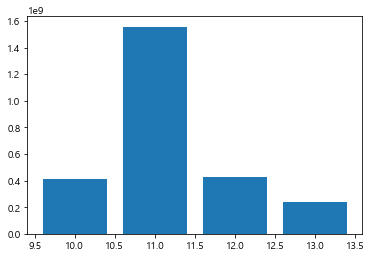

In [117]:
plt.bar("week",'추정가격',data=temp)
#plt.tight_layout()

<BarContainer object of 294813 artists>

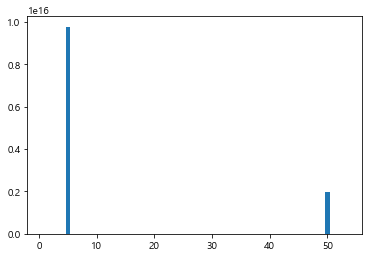

In [118]:
plt.bar("week",'추정가격',data=df_service)
plt.show()